**Feature Details**

**Gender**: Represents the gender of the individual (Male or Female).

**Age**: Refers to the age of the individual in years.

**Height**: Indicates the height of the individual in centimeters.

**Weight**: Represents the weight of the individual in kilograms.

**family_history_with_overweight**: Indicates whether the individual has a family history of overweight or obesity (Yes or No).

**FAVC**: Represents the consumption of high-caloric food frequency (Frequent or Not frequent).

**FCVC**: Represents the consumption of vegetables frequency (Frequent or Not frequent).

**NCP**: Refers to the number of main meals per day (1, 2, 3, or more).

**CAEC**: Represents the consumption of food between meals frequency (Frequently, Sometimes, or No).

**SMOKE**: Indicates whether the individual is a smoker or not (Yes or No).

**CH2O**: Refers to the daily water intake (in liters).

**SCC**: Represents the calories consumption monitoring (Yes or No).

**FAF**: Refers to the physical activity frequency (0 - very low, 1 - low, 2 - medium, 3 - high, 4 - very high).

**TUE**: Represents the daily time spent on TV or computer use (0 - none, 1 - 1 hour, 2 - 2 hours, 3 - 3 hours, 4 - more than 4 hours).

**CALC**: Indicates whether the individual is using a calculator at work or school (Always, Sometimes, or No).

**MTRANS**: Represents the transportation method used (Automobile, Bike, Motorbike, Public Transportation, or Walking).

**NObeyesdad**: Represents the class label indicating the level of obesity (Target variable). It includes different levels such as:

- Insufficient Weight
- Normal Weight
- Overweight Level I
- Overweight Level II
- Obesity Type I
- Obesity Type II
- Obesity Type III (Extreme Obesity)

In [9]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# importing dataset

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

In [4]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Basic Analysis

In [5]:
# Shape of the dataset
print(f"No of Rows : {df.shape[0]} \nNo of columns : {df.shape[1]}")

No of Rows : 2111 
No of columns : 17


In [6]:
# Basic Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

Observations:

1.No missing/null values found in the data.

2.8 features having numeric data and remaining 8 contain text data.

3."NObeyesdad" is our target feature.

In [7]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

#### Feature 1: 

**Gender**: Represents the gender of the individual (Male or Female).

- Gender is a Categorical variable without any inherent order or we can say it is Nominal Variable.
- We can't use Label Encoding to convert Gender to Numerical Variable.
- We can use One Hot Encoding to convert Gender to Numerical Variable.

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df['Gender'].dtype

dtype('O')

In [12]:
# Initialize OneHotEncoder
ohe = OneHotEncoder()

# Fit-transform the categorical column
gender_encoded = ohe.fit_transform(df[['Gender']]).toarray()

df_gender = pd.DataFrame(gender_encoded, columns=ohe.get_feature_names_out(['Gender']))

df_gender

,Gender_Female,Gender_Male
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
2106,1.0,0.0
2107,1.0,0.0
2108,1.0,0.0
2109,1.0,0.0


In [14]:
# Concatenate the original DataFrame with the encoded columns
df = pd.concat([df, df_gender], axis=1)

In [15]:
# Dropping 'Gender' column
df.drop(columns=['Gender'], axis=1, inplace=True)

In [16]:
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
2,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0,0.0,1.0
3,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0,0.0,1.0
4,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0,0.0,1.0


#### Feature 5:

**family_history_with_overweight**: Indicates whether the individual has a family history of overweight or obesity (Yes or No).

- this categorical variable contains Ordinal values
- this can be converted to a numeric variable by using LabelEncoding

In [17]:
df['family_history_with_overweight'].unique()


array(['yes', 'no'], dtype=object)

In [18]:
df['family_history_with_overweight'].dtype

dtype('O')

In [19]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['family_history_with_overweight'])
 
# printing label
label

array([1, 1, 1, ..., 1, 1, 1])

In [20]:
# Encoding the 'family_history_with_overweight' column
df['family_history_with_overweight'] = label

# Updated Dataframe 
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
1,21.0,1.52,56.0,1,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
2,23.0,1.80,77.0,1,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0,0.0,1.0
3,27.0,1.80,87.0,0,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0,0.0,1.0
4,22.0,1.78,89.8,0,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0,0.0,1.0


#### Features 6:

**FAVC**: Represents the consumption of high-caloric food frequency (Frequent or Not frequent).

- this feature contain binary values - yes or no.
- this can also be encoded using LabelEncoder function

In [21]:
df['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
favc_encoded = le.fit_transform(df['FAVC'])
 
# printing label
favc_encoded

array([0, 0, 0, ..., 1, 1, 1])

In [23]:
# Encoding the 'family_history_with_overweight' column
df['FAVC'] = favc_encoded

# Updated Dataframe 
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,0,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
1,21.0,1.52,56.0,1,0,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
2,23.0,1.80,77.0,1,0,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0,0.0,1.0


#### Feature 9:

**CAEC**: Represents the consumption of food between meals frequency ('Sometimes', 'Frequently', 'Always', 'no').

- this categorical variable contain 4 values - 'Sometimes', 'Frequently', 'Always', 'no'
- we can consider this as ordinal variable with the following orders
    - 'no' = 0
    - 'Sometimes' = 1
    - 'Frequently' = 2
    - 'Always' = 3
- this encoding can be achived by using LabelEncoder


In [24]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [25]:
df['CAEC'].dtype

dtype('O')

In [26]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
caec_encoded = le.fit_transform(df['CAEC'])
 
# printing label
set(caec_encoded)

{0, 1, 2, 3}

In [27]:
# Encoding the 'family_history_with_overweight' column
df['CAEC'] = caec_encoded

# Updated Dataframe 
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,0,2.0,3.0,2,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
1,21.0,1.52,56.0,1,0,3.0,3.0,2,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
2,23.0,1.80,77.0,1,0,2.0,3.0,2,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,2,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,2,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0,0.0,1.0


#### Feature 10:

**SMOKE**: Indicates whether the individual is a smoker or not (Yes or No).

- this feature contain binary values - yes or no.
- this can also be encoded using LabelEncoder function

In [29]:
df['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [30]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
smoke_encoded = le.fit_transform(df['SMOKE'])
 
# printing label
smoke_encoded

array([0, 1, 0, ..., 0, 0, 0])

In [31]:
df['SMOKE'] = smoke_encoded

# Updated Dataframe 
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
1,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
2,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0,0.0,1.0


#### Feature 12:

**SCC**: Represents the calories consumption monitoring (Yes or No).

- this feature contain binary values - yes or no.
- this can also be encoded using LabelEncoder function

In [32]:
df['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [33]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
scc_encoded = le.fit_transform(df['SCC'])
 
# printing label
scc_encoded

array([0, 1, 0, ..., 0, 0, 0])

In [34]:
# Encoding the 'family_history_with_overweight' column
df['SCC'] = scc_encoded

# Updated Dataframe 
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
1,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
2,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,0.0,1.0,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,Frequently,Walking,Overweight_Level_I,0.0,1.0,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,0.0,1.0,0.0,1.0


#### Feature 13 :

**FAF**: Refers to the physical activity frequency (0 - very low, 1 - low, 2 - medium, 3 - high).

- this feature contains float values in the range [0, 3]

In [35]:
df['FAF'].unique()

array([0.      , 3.      , 2.      , ..., 1.414209, 1.139107, 1.026452])

In [36]:
df['FAF'].value_counts()

0.000000    411
1.000000    234
2.000000    183
3.000000     75
0.110174      2
           ... 
1.916751      1
0.954459      1
0.340915      1
0.986414      1
1.026452      1
Name: FAF, Length: 1190, dtype: int64

#### Feature 15:

**CALC**: Indicates whether the individual is using a calculator at work or school ('no', 'Sometimes', 'Frequently', 'Always').

- this feature is a ordinal variable as the values can be converted to numbers in the following format:
    - 'no' -> 0,
    - 'Sometimes' -> 1,
    - 'Frequently'-> 3,
    - 'Always' -> 4
- we can perform the above encoding by using LabelEncoding

In [37]:
df['CALC'].describe()

count          2111
unique            4
top       Sometimes
freq           1401
Name: CALC, dtype: object

In [38]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [39]:
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
calc_encoded = le.fit_transform(df['CALC'])
 
# printing label
calc_encoded

array([3, 2, 1, ..., 2, 2, 2])

In [40]:
# Encoding the 'family_history_with_overweight' column
df['CALC'] = scc_encoded

# Updated Dataframe 
df.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Gender_Female,Gender_Male,Gender_Female,Gender_Male
0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
1,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight,1.0,0.0,1.0,0.0
2,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,0,Public_Transportation,Normal_Weight,0.0,1.0,0.0,1.0
3,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,0,Walking,Overweight_Level_I,0.0,1.0,0.0,1.0
4,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,0,Public_Transportation,Overweight_Level_II,0.0,1.0,0.0,1.0


#### Feature 16 :

**MTRANS**: Represents the transportation method used ('Public_Transportation', 'Walking', 'Automobile', 'Motorbike','Bike').

- this categorical feature contain 5 different categories but there is no such specific order.
- to convert this feature to numeric, we need to use OneHot Encoding.

In [42]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [43]:
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

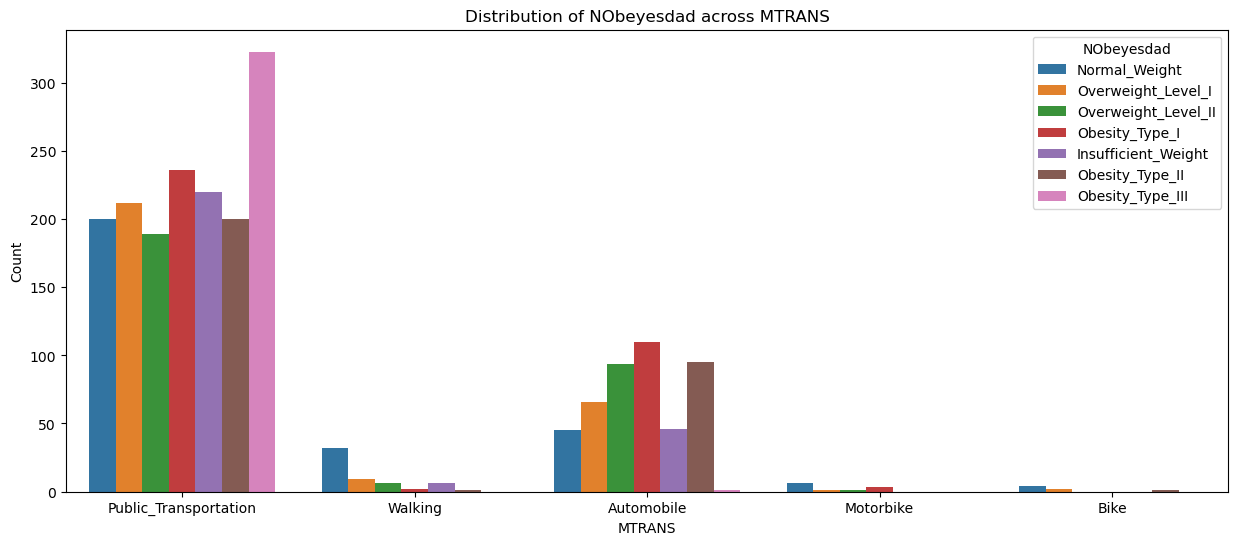

In [44]:
# Create a bar plot to compare MTRANS and NObeyesdad
plt.figure(figsize=(15,6))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=df, )

# Set the labels and title
plt.xlabel('MTRANS')
plt.ylabel('Count')
plt.title('Distribution of NObeyesdad across MTRANS')

# Show the plot
plt.show()

In [45]:
# Initialize OneHotEncoder
ohe_trans = OneHotEncoder()

# Fit-transform the categorical column
trans_encoded = ohe_trans.fit_transform(df[['MTRANS']]).toarray()

df_trans = pd.DataFrame(trans_encoded, columns=ohe_trans.get_feature_names_out(['MTRANS']))

df_trans

,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
2106,0.0,0.0,0.0,1.0,0.0
2107,0.0,0.0,0.0,1.0,0.0
2108,0.0,0.0,0.0,1.0,0.0
2109,0.0,0.0,0.0,1.0,0.0


In [46]:
# Concatenate the original DataFrame with the encoded columns
df = pd.concat([df, df_trans], axis=1)

In [47]:
# Dropping the original 'MTRANS' column
df.drop(columns=['MTRANS'], axis=1, inplace=True)

In [48]:
# Updated Dataset
df.head().T

,0,1,2,3,4
Age,21.0,21.0,23.0,27.0,22.0
Height,1.62,1.52,1.8,1.8,1.78
Weight,64.0,56.0,77.0,87.0,89.8
family_history_with_overweight,1,1,1,0,0
FAVC,0,0,0,0,0
FCVC,2.0,3.0,2.0,3.0,2.0
NCP,3.0,3.0,3.0,3.0,1.0
CAEC,2,2,2,2,2
SMOKE,0,1,0,0,0
CH2O,2.0,3.0,2.0,2.0,2.0


#### Feature 17: Target Feature

**NObeyesdad**: Represents the class label indicating the level of obesity (Target variable). It includes different levels such as:

    - Insufficient Weight
    - Normal Weight
    - Overweight Level I
    - Overweight Level II
    - Obesity Type I
    - Obesity Type II
    - Obesity Type III (Extreme Obesity)

- We need to apply LabelEncoding before training our model

In [50]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [51]:
# Perform label encoding on the output feature
le_target = LabelEncoder()
df['output_feature_encoded'] = le_target.fit_transform(df['NObeyesdad'])

# Optionally, you can store the mapping of labels to encoded values
label_mapping = dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))

In [52]:
label_mapping

{'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Obesity_Type_I': 2,
 'Obesity_Type_II': 3,
 'Obesity_Type_III': 4,
 'Overweight_Level_I': 5,
 'Overweight_Level_II': 6}

In [53]:
# Dropping "NObeyesdad" column
df.drop(columns=["NObeyesdad"], axis=1, inplace=True)

# Updated Dataset
df.head().T

,0,1,2,3,4
Age,21.00,21.00,23.0,27.0,22.00
Height,1.62,1.52,1.8,1.8,1.78
Weight,64.00,56.00,77.0,87.0,89.80
family_history_with_overweight,1.00,1.00,1.0,0.0,0.00
FAVC,0.00,0.00,0.0,0.0,0.00
FCVC,2.00,3.00,2.0,3.0,2.00
NCP,3.00,3.00,3.0,3.0,1.00
CAEC,2.00,2.00,2.0,2.0,2.00
SMOKE,0.00,1.00,0.0,0.0,0.00
CH2O,2.00,3.00,2.0,2.0,2.00


### Feature Seperation

Seperating Input features and Target Feature

In [55]:
# Separate the input features and output variable
X = df.drop('output_feature_encoded', axis=1)
y = df['output_feature_encoded']

In [56]:
print(f"Input Features : ")
for i, feature in enumerate(X.columns):
    print(f"{i+1}) {feature}")

Input Features : 
1) Age
2) Height
3) Weight
4) family_history_with_overweight
5) FAVC
6) FCVC
7) NCP
8) CAEC
9) SMOKE
10) CH2O
11) SCC
12) FAF
13) TUE
14) CALC
15) Gender_Female
16) Gender_Male
17) Gender_Female
18) Gender_Male
19) MTRANS_Automobile
20) MTRANS_Bike
21) MTRANS_Motorbike
22) MTRANS_Public_Transportation
23) MTRANS_Walking


### Feature Selection

#### 1. Univariate Selection

- In univariate feature selection, you can use statistical tests to determine the relationship between each feature and the target variable. Features that have a weak statistical relationship with the target variable are considered less useful or irrelevant.



##### Feature selection using the **chi-square** test for classification problems

In [58]:
# Apply SelectKBest with chi2 test to get feature scores
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the feature scores and p-values
feature_scores = selector.scores_
p_values = selector.pvalues_

# Sort the features by their scores in descending order
sorted_indices = feature_scores.argsort()[::-1]


In [59]:
# Create a dataframe for sorted_indices
df_sorted = pd.DataFrame(columns=['Feature', 'Score', 'p-value'])

# Iterate over the sorted_indices and add feature details to the dataframe
for idx in sorted_indices:
    feature_name = X.columns[idx]
    score = round(feature_scores[idx],2)
    p_value = round(p_values[idx], 6)
    new_row = {'Feature': feature_name, 'Score': score, 'p-value': p_value}
    df_sorted.loc[len(df_sorted)] = new_row

# Print the sorted dataframe
df_sorted

,Feature,Score,p-value
0,Weight,14186.71,0.000000
1,Age,635.64,0.000000
2,Gender_Female,332.77,0.000000
3,Gender_Female,332.77,0.000000
4,Gender_Male,324.98,0.000000
5,Gender_Male,324.98,0.000000
6,MTRANS_Automobile,121.28,0.000000
7,SCC,117.43,0.000000
8,CALC,117.43,0.000000
9,family_history_with_overweight,113.44,0.000000


In [60]:
df_sorted.Feature.unique()

array(['Weight', 'Age', 'Gender_Female', 'Gender_Male',
       'MTRANS_Automobile', 'SCC', 'CALC',
       'family_history_with_overweight', 'MTRANS_Walking', 'FAF', 'FCVC',
       'CAEC', 'MTRANS_Public_Transportation', 'NCP', 'SMOKE', 'FAVC',
       'TUE', 'MTRANS_Motorbike', 'CH2O', 'MTRANS_Bike', 'Height'],
      dtype=object)

**Observations:**

1. If we consider score = 25 as thresholed, then last four features('MTRANS_Motorbike', 'CH2O', 'MTRANS_Bike', 'Height') are least important.

2. If we consider p-value = 0.05 as threshold, then "Height" is the least important feature.

In [62]:
# Apply the ANOVA test using the f_classif function
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to store the results
anova_df = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'p-value': p_values})

# Sort the DataFrame based on p-values in ascending order
anova_df.sort_values('p-value', inplace=True)

anova_df['p-value'] = anova_df['p-value'].apply(lambda x: round(x, 4))

anova_df


,Feature,F-Score,p-value
2,Weight,1966.518018,0.0000
17,Gender_Male,158.712595,0.0000
16,Gender_Female,158.712595,0.0000
14,Gender_Female,158.712595,0.0000
15,Gender_Male,158.712595,0.0000
3,family_history_with_overweight,146.477128,0.0000
5,FCVC,112.315462,0.0000
7,CAEC,81.096953,0.0000
0,Age,77.954154,0.0000
4,FAVC,43.578216,0.0000


In [63]:
anova_df.Feature.unique()

array(['Weight', 'Gender_Male', 'Gender_Female',
       'family_history_with_overweight', 'FCVC', 'CAEC', 'Age', 'FAVC',
       'Height', 'MTRANS_Automobile', 'MTRANS_Public_Transportation',
       'NCP', 'SCC', 'CALC', 'MTRANS_Walking', 'FAF', 'CH2O', 'TUE',
       'SMOKE', 'MTRANS_Motorbike', 'MTRANS_Bike'], dtype=object)



1. List of least important features : 'TUE', 'SMOKE', 'MTRANS_Motorbike', 'MTRANS_Bike'

### Removing Least important features

with the help of the results of the chi2 test and ANOVA test, we can remove the following least important features:

1. 'MTRANS_Motorbike', 
2. 'MTRANS_Bike'

In [64]:
X.drop(columns=['MTRANS_Motorbike', 'MTRANS_Bike'], inplace=True)

In [65]:
X.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Gender_Female', 'Gender_Male', 'Gender_Female', 'Gender_Male',
       'MTRANS_Automobile', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

### Multicolinearity

In [67]:
# Add a constant column to the DataFrame
df_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF values
vif

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,const,0.000000
1,Age,2.019421
2,Height,2.621855
3,Weight,2.218843
4,family_history_with_overweight,1.399398
5,FAVC,1.190076
6,FCVC,1.230195
7,NCP,1.105373
8,CAEC,1.190109
9,SMOKE,1.032514


**Observations:**

1. SCC (calories consumption monitoring (Yes or No)) is not that important feature to predict Obesity.
    This feature can be dropped.

2. CALC (Indicates whether the individual is using a calculator at work or school (Always, Sometimes, or No)) is not that important feature to predict obesity.

3. Gender_Male and Gender_Female are similar to each other and have a huge multicolinearity effect. It will be better to keep any one of them.

4. "MTRANS_Automobile" and "MTRANS_Public_Transportation" have very high VIF score. So, we must keep any one of them.

So, we must drop following 3 columns:
- Gender_Male
- SCC
- CALC
- MTRANS_Automobile

Feature removal depending on the conclusion of the Multicolinearity test

In [72]:
X.drop(columns=['SCC', 'CALC', 'Gender_Male', 'MTRANS_Automobile'], inplace=True)

In [73]:
X.columns


Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Female', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')

# Multicolinearity on top of updated data frame

In [74]:
# Add a constant column to the DataFrame
df_with_const = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = df_with_const.columns
vif["VIF"] = [variance_inflation_factor(df_with_const.values, i) for i in range(df_with_const.shape[1])]

# Print the VIF values
vif

C:\Users\lenovo\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Feature,VIF
0,const,916.562455
1,Age,1.980606
2,Height,2.610902
3,Weight,2.205225
4,family_history_with_overweight,1.390372
5,FAVC,1.171665
6,FCVC,1.223545
7,NCP,1.105293
8,CAEC,1.181606
9,SMOKE,1.028153


In [75]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1688, 16) (1688,)
Testing set shape: (423, 16) (423,)


In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model1 : Logistic Regression

In [77]:


logreg = LogisticRegression()
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the accuracy of the model
logreg_accuracy = accuracy_score(y_test, y_pred)



Model 2: Decision Tree

In [78]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the accuracy of the model
dt_accuracy = accuracy_score(y_test, y_pred)



Model3 : Random Forest

In [79]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)

Model : Support Vector Machines

In [82]:
# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)

# Evaluate the accuracy of the model
svm_accuracy = accuracy_score(y_test, y_pred)

Model :Gradient Boosting

In [83]:
# Create an instance of the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the accuracy of the model
gb_accuracy = accuracy_score(y_test, y_pred)



Model6: Neural Networks

In [85]:
# Neural Networks
# Create an instance of the MLP Classifier
mlp = MLPClassifier(max_iter=500)  # Increase max_iter value
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

mlp_accuracy = accuracy_score(y_test, y_pred)

Selecting bet model

In [86]:
models_list = ['LogReg', 'D Tree', 'R Forest', 'SVM', 'G Boosting', 'MLP']
accuracy_list = [logreg_accuracy, dt_accuracy, rf_accuracy, svm_accuracy, gb_accuracy, mlp_accuracy]

accuracy_df = pd.DataFrame(data = {'Model':models_list, 'Accuracy':accuracy_list})

accuracy_df.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,R Forest,0.959811
4,G Boosting,0.955083
1,D Tree,0.950355
0,LogReg,0.874704
5,MLP,0.799054
3,SVM,0.565012


# we can see that GB, RF and DT arethe best performing models with 95% + accuracy. We can use any of them as our final model.